# Analiza danych zbioru: Absenteeism at work - przewidywanie wystąpienia nieobecności

---

## Informacje o autorze

- **Imię**: Kacper
- **Nazwisko**: Jarosik
- **Data**: Absenteeism at work

---


## **1. Opis problemu**

### **a) Opis zbioru danych, cechy i źródło danych**

#### **Ogólny opis zbioru**

Zbiór danych oferuje możliwości tworzenia różnych kombinacji atrybutów, ich wykluczania lub zmiany typu (kategoryczny, całkowity, rzeczywisty), w zależności od celu badania. Został wykorzystany w badaniach naukowych przeprowadzonych na Universidade Nove de Julho w ramach Podyplomowego Programu Informatyki i Zarządzania Wiedzą.

**Źródło danych:** [Absenteeism at work dataset](https://archive.ics.uci.edu/dataset/445/absenteeism+at+work)

#### **Opis cech**

1. **Identyfikacja indywidualna (ID)**
2. **Powód nieobecności (ICD)**
   Nieobecności poświadczone przez Międzynarodowy Kodeks Chorób ([ICD](http://www.leksykon.com.pl/icd.html#icd-A.html)) podzielone są na 21 kategorii:

   - **I**: Niektóre choroby zakaźne i pasożytnicze
   - **II**: Nowotwory
   - **III**: Choroby krwi i narządów krwiotwórczych oraz zaburzenia immunologiczne
   - **IV**: Choroby endokrynologiczne, odżywcze i metaboliczne
   - **V**: Zaburzenia psychiczne i behawioralne
   - **VI**: Choroby układu nerwowego
   - **VII**: Choroby oka i przydatków
   - **VIII**: Choroby ucha i wyrostka sutkowatego
   - **IX**: Choroby układu krążenia
   - **X**: Choroby układu oddechowego
   - **XI**: Choroby układu pokarmowego
   - **XII**: Choroby skóry i tkanki podskórnej
   - **XIII**: Choroby układu mięśniowo-szkieletowego i tkanki łącznej
   - **XIV**: Choroby układu moczowo-płciowego
   - **XV**: Ciąża, poród i połóg
   - **XVI**: Stany okołoporodowe
   - **XVII**: Wrodzone wady rozwojowe i nieprawidłowości chromosomowe
   - **XVIII**: Objawy i nieprawidłowe wyniki badań
   - **XIX**: Urazy, zatrucia i skutki przyczyn zewnętrznych
   - **XX**: Zewnętrzne przyczyny zachorowalności i umieralności
   - **XXI**: Czynniki wpływające na stan zdrowia i kontakt ze służbą zdrowia

   Dodatkowo wyróżniono 7 kategorii niezwiązanych bezpośrednio z ICD:
   - (22): Obserwacja pacjenta
   - (23): Konsultacja lekarska
   - (24): Oddawanie krwi
   - (25): Badanie laboratoryjne
   - (26): Nieusprawiedliwiona nieobecność
   - (27): Fizjoterapia
   - (28): Konsultacja stomatologiczna


3. **Miesiąc nieobecności**
4. **Dzień tygodnia**: poniedziałek (2), wtorek (3), środa (4), czwartek (5), piątek (6)
5. **Pory roku**: lato (1), jesień (2), zima (3), wiosna (4)
6. **Koszty transportu**
7. **Odległość od miejsca zamieszkania do pracy (w km)**
8. **Czas służby**
9. **Wiek**
10. **Obciążenie pracą (średnie/dzień)**
11. **Osiągnięty cel**
12. **Niewypełnienie obowiązku dyscyplinarnego**: tak (1), nie (0)
13. **Wykształcenie**: liceum (1), studia licencjackie (2), studia podyplomowe (3), magister i doktor (4)
14. **Syn**: liczba dzieci
15. **Towarzyski pijący**: tak (1), nie (0)
16. **Towarzyski palacz**: tak (1), nie (0)
17. **Zwierzę domowe**: liczba zwierząt
18. **Waga**
19. **Wzrost**
20. **Wskaźnik masy ciała**
21. **Czas nieobecności (w godzinach)**: cel


### **b) Import potrzebnych bibliotek**

In [427]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from IPython.display import display, Markdown

### **c) Załadowanie zbioru danych**
Można zaobserwować, że wszystkie dane są liczbowe 

In [428]:
# Wczytanie pliku Excel
file_path = "data\\Absenteeism_at_work.xls"
df = pd.read_excel(file_path)
df.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2


## **2. Opis danch**

### **a) Statystyki opisowe**
Dla każdej kolumny zostały sprawdzone takie dane jak: ilość danych, średnia, odchylenie standardowe, wartość minimalną i maksymalną, oraz wartości w 25, 50 i 75%.
Można zaobserwować jakie wartości są dominujące w zbiorze.

In [429]:
pd.set_option('display.max_columns', None)
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


### **b) Wizualizacja danych**
Umożliwia wgląd w histogramy każdej kolumny, oraz w ich siatkę korelacji.

Histogramy pozwalają zaobserwować, czy rozkład danych jest równomierny i jakie wartości dominują.

Dla czytelności usunięte zostały warości dla których modół korelacji był mniejszy niż 0.25


Korelacja pozwala wyróżnić przydatne cechy jeśli korelują z targetem lub pozwala wyeliminować, cechy które korelują między sobą i powielają te same informacje

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Reason for absence'}>,
        <AxesSubplot:title={'center':'Month of absence'}>,
        <AxesSubplot:title={'center':'Day of the week'}>,
        <AxesSubplot:title={'center':'Seasons'}>],
       [<AxesSubplot:title={'center':'Transportation expense'}>,
        <AxesSubplot:title={'center':'Distance from Residence to Work'}>,
        <AxesSubplot:title={'center':'Service time'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Work load Average/day '}>],
       [<AxesSubplot:title={'center':'Hit target'}>,
        <AxesSubplot:title={'center':'Disciplinary failure'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Son'}>,
        <AxesSubplot:title={'center':'Social drinker'}>],
       [<AxesSubplot:title={'center':'Social smoker'}>,
        <AxesSubplot:title={'center':'Pet'}>,
        <AxesSubplot:title={'center':'Weight'}

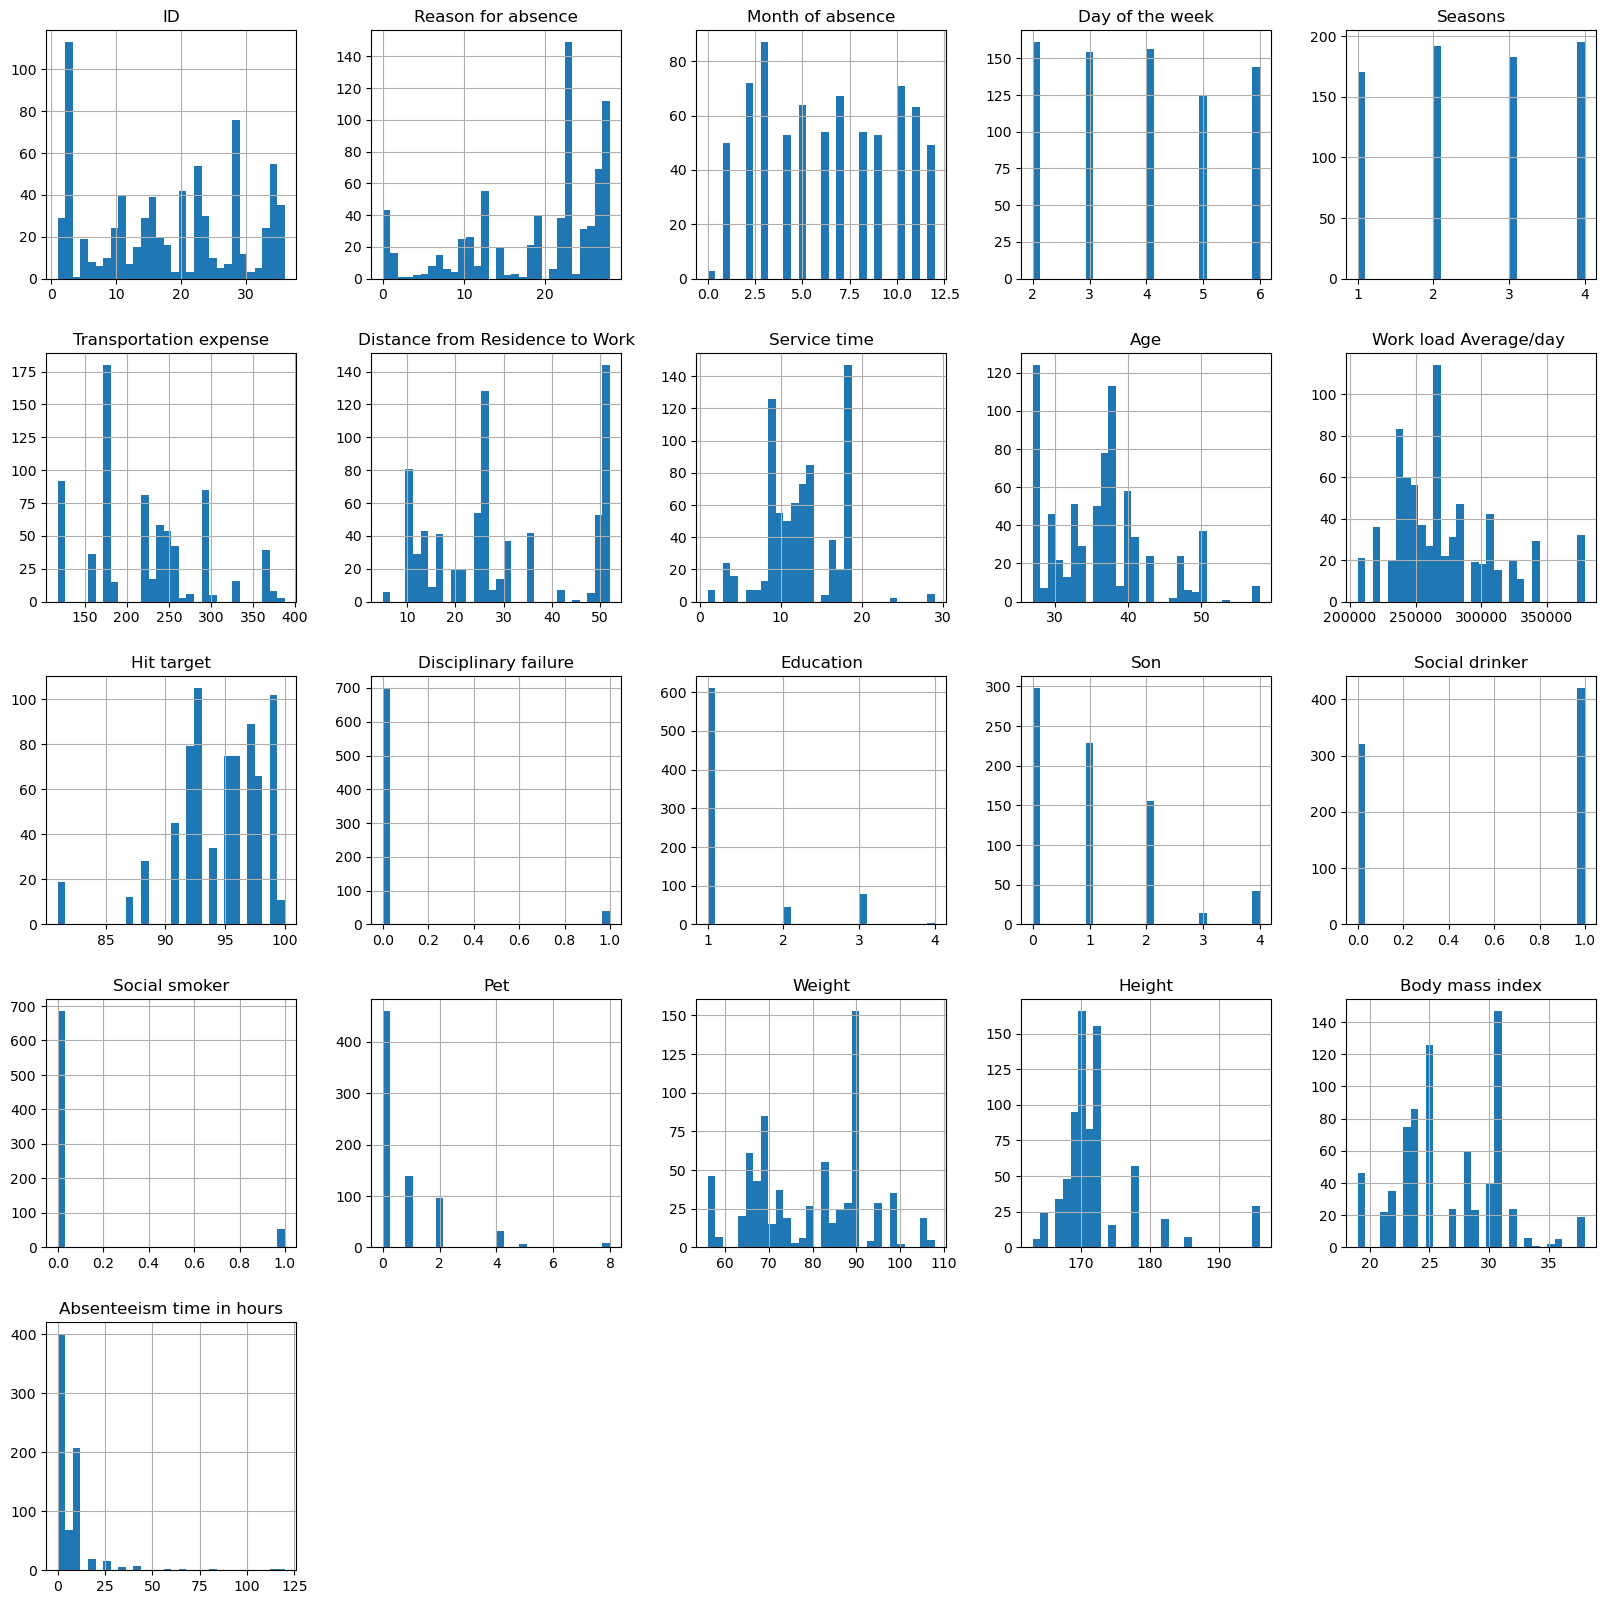

In [430]:
# histogramy dla wszystkich kolumn
df.hist(bins= 30, figsize=(20,20))

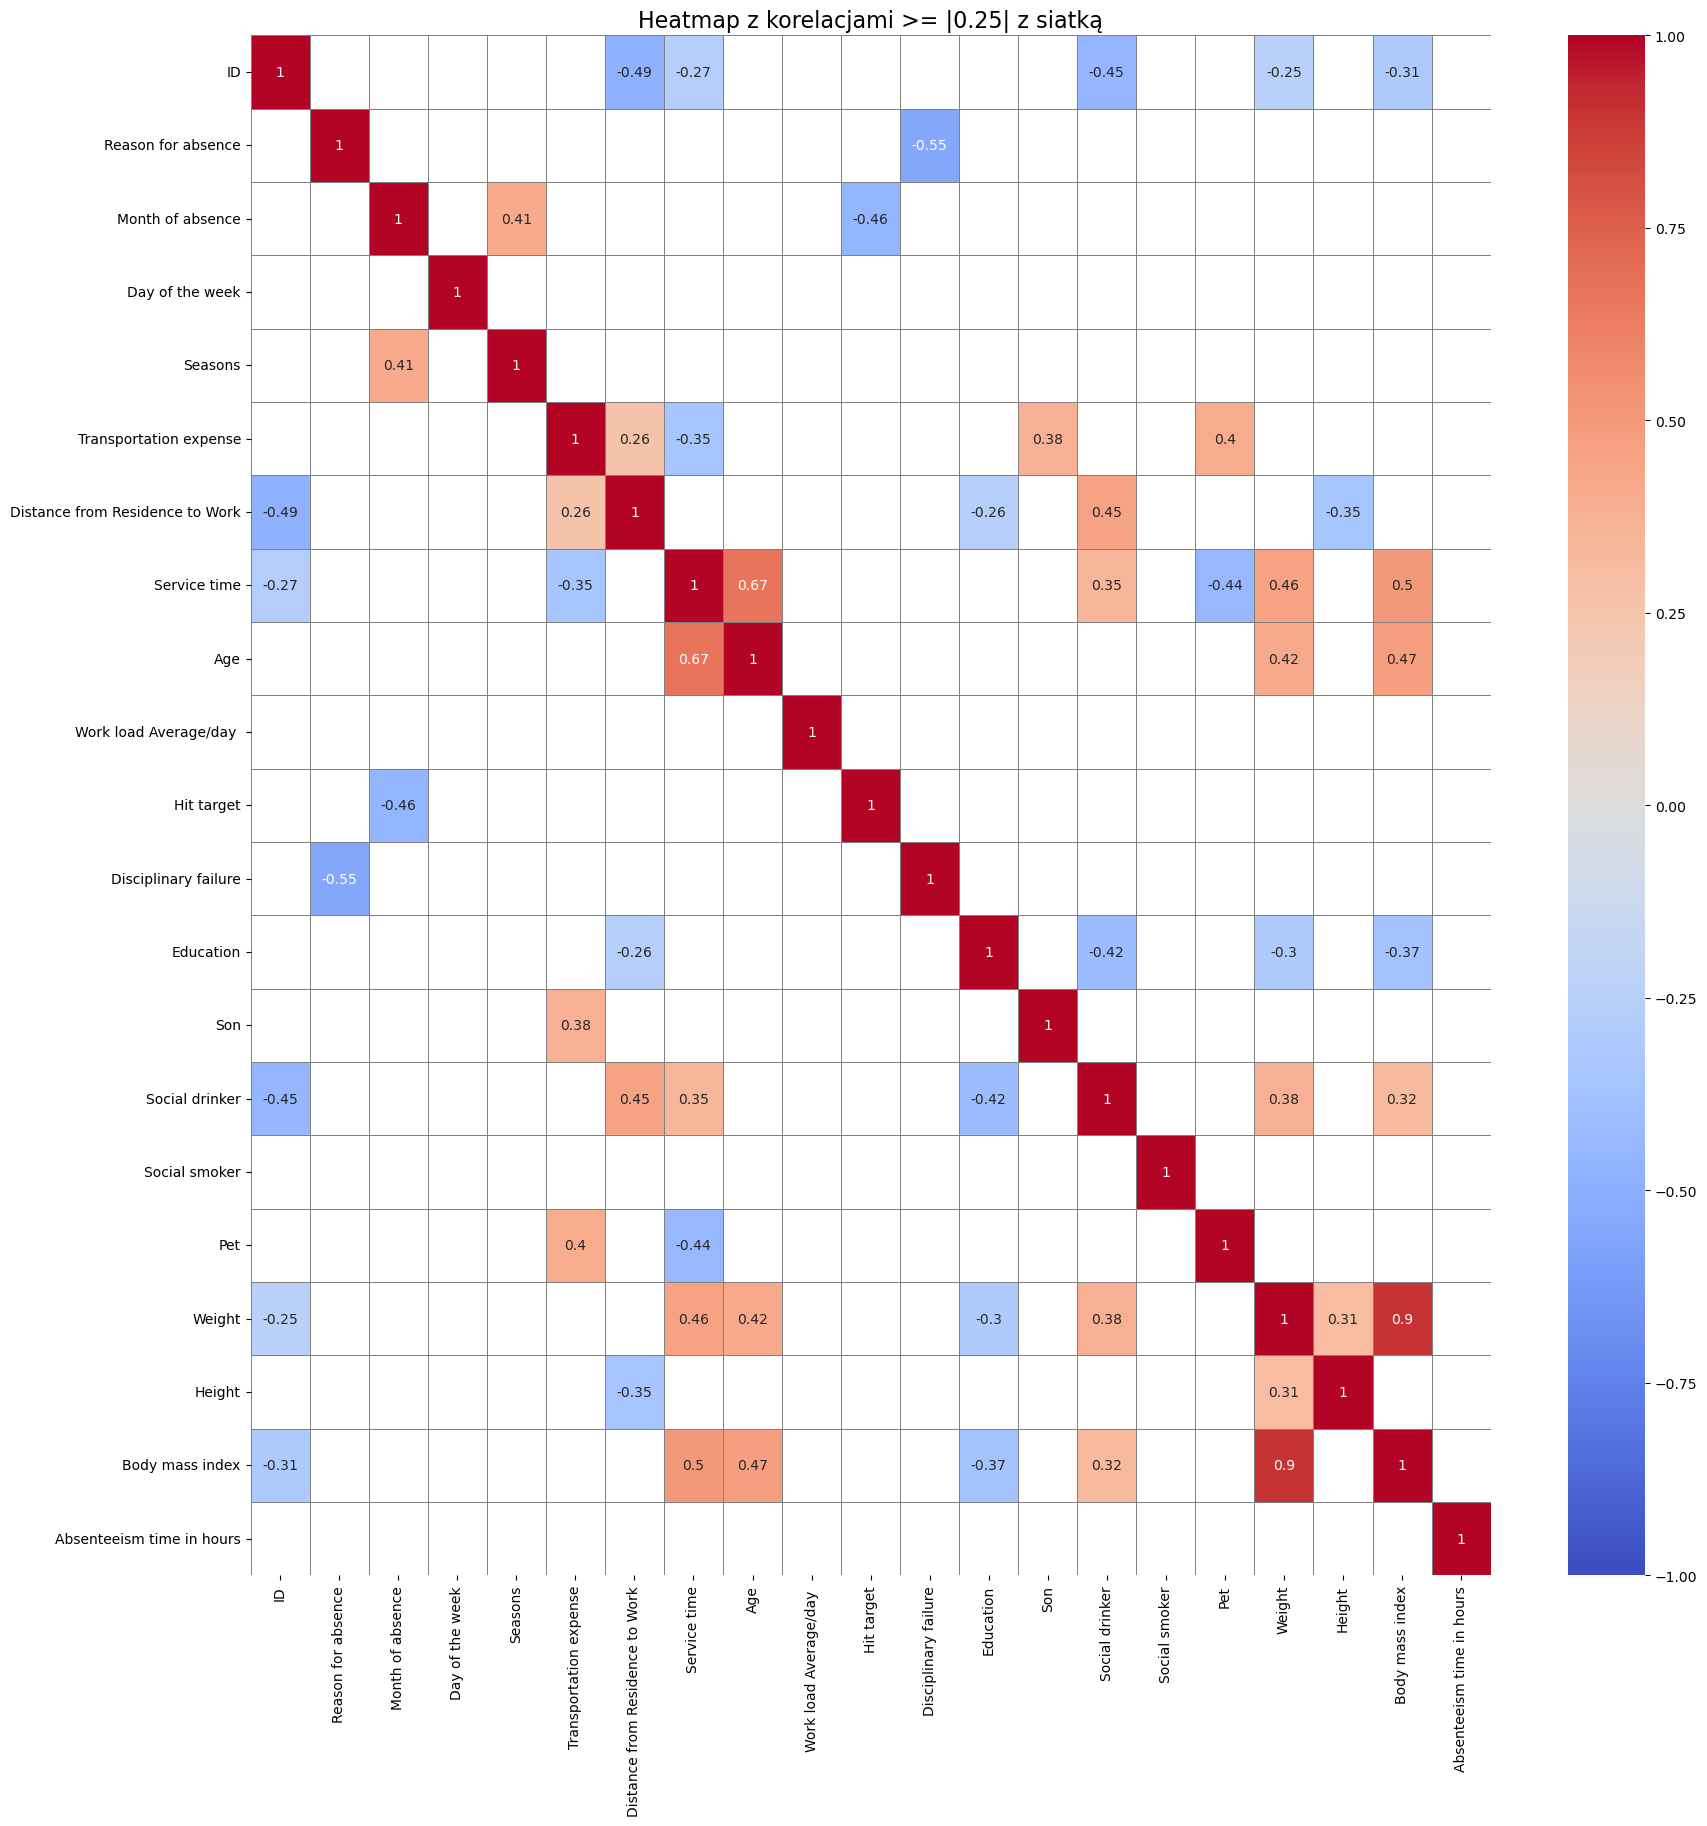

In [431]:
# korelacja
correlations = df.corr()
# Wyzerowanie wartości, których wartość absolutna jest mniejsza niż 0.25
threshold = 0.25
filtered_correlations = correlations.where(np.abs(correlations) >= threshold)

# Wykres
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(filtered_correlations.round(2), 
            annot=True, 
            cmap="coolwarm", 
            vmin=-1, 
            vmax=1, 
            cbar=True, 
            linewidths=0.5,
            linecolor='gray')
# Dodanie siatki dla osi
ax.set_xticks(np.arange(filtered_correlations.shape[1]) + 0.5, minor=True)
ax.set_yticks(np.arange(filtered_correlations.shape[0]) + 0.5, minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
ax.tick_params(which="minor", bottom=False, left=False)

plt.title("Heatmap z korelacjami >= |0.25| z siatką", fontsize=16)
plt.show()

## **3. Przygotowanie danych**

### **a) Weryfikacja prawidłowości danych i ich korekta**
Dane są kompletne: Na 740 wierszy w każdej z kolumny jest 740 wartości różnych od null

Problematyczne dane to 3x miesiąc przyjmuje wartość 0, gdzie normalny zasięg to 1-12.

Zastosowałem zamianę 0 w miesiącach na najczęsciej wystapujący numer miesiąca w danym sezonie w bazie danych dla danego wiersza danych.

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [433]:
# Znalezienie najczęściej występującego miesiąca w każdym sezonie
most_common_month_per_season = (
    df[df['Month of absence'] != 0]  # Pomijamy rekordy z miesiącem = 0
    .groupby('Seasons')['Month of absence']
    .agg(lambda x: x.mode()[0])  # Znalezienie najczęściej występującej wartości
)

# Dane początkowe posortowane
dane_poczatkowe = (
    df['Month of absence'].value_counts()
    .reset_index()
    .rename(columns={'index': 'Miesiąc', 'Month of absence': 'Liczba wystąpień'})
    .sort_values('Miesiąc')  # Sortowanie po miesiącach
    .reset_index(drop=True)
)

# Zamiana wartości 0 na odpowiednie miesiące
df.loc[df['Month of absence'] == 0, 'Month of absence'] = df.loc[df['Month of absence'] == 0, 'Seasons'].map(most_common_month_per_season)

# Dane po zastąpieniu
dane_po_zastapieniu = (
    df['Month of absence'].value_counts()
    .reset_index()
    .rename(columns={'index': 'Miesiąc', 'Month of absence': 'Liczba wystąpień'})
    .sort_values('Miesiąc')  # Sortowanie po miesiącach
    .reset_index(drop=True)
)

# Wyświetlanie tabel bez numeracji wierszy
display(Markdown("### Dane początkowe (posortowane według miesięcy)"))
display(Markdown(dane_poczatkowe.to_html(index=False, escape=False)))

display(Markdown("### Dane po zastąpieniu wartości 0 w miesiącach (posortowane według miesięcy)"))
display(Markdown(dane_po_zastapieniu.to_html(index=False, escape=False)))


### Dane początkowe (posortowane według miesięcy)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Miesiąc</th>
      <th>Liczba wystąpień</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>3</td>
    </tr>
    <tr>
      <td>1</td>
      <td>50</td>
    </tr>
    <tr>
      <td>2</td>
      <td>72</td>
    </tr>
    <tr>
      <td>3</td>
      <td>87</td>
    </tr>
    <tr>
      <td>4</td>
      <td>53</td>
    </tr>
    <tr>
      <td>5</td>
      <td>64</td>
    </tr>
    <tr>
      <td>6</td>
      <td>54</td>
    </tr>
    <tr>
      <td>7</td>
      <td>67</td>
    </tr>
    <tr>
      <td>8</td>
      <td>54</td>
    </tr>
    <tr>
      <td>9</td>
      <td>53</td>
    </tr>
    <tr>
      <td>10</td>
      <td>71</td>
    </tr>
    <tr>
      <td>11</td>
      <td>63</td>
    </tr>
    <tr>
      <td>12</td>
      <td>49</td>
    </tr>
  </tbody>
</table>

### Dane po zastąpieniu wartości 0 w miesiącach (posortowane według miesięcy)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Miesiąc</th>
      <th>Liczba wystąpień</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>50</td>
    </tr>
    <tr>
      <td>2</td>
      <td>73</td>
    </tr>
    <tr>
      <td>3</td>
      <td>87</td>
    </tr>
    <tr>
      <td>4</td>
      <td>53</td>
    </tr>
    <tr>
      <td>5</td>
      <td>65</td>
    </tr>
    <tr>
      <td>6</td>
      <td>54</td>
    </tr>
    <tr>
      <td>7</td>
      <td>68</td>
    </tr>
    <tr>
      <td>8</td>
      <td>54</td>
    </tr>
    <tr>
      <td>9</td>
      <td>53</td>
    </tr>
    <tr>
      <td>10</td>
      <td>71</td>
    </tr>
    <tr>
      <td>11</td>
      <td>63</td>
    </tr>
    <tr>
      <td>12</td>
      <td>49</td>
    </tr>
  </tbody>
</table>

### **b) Wybór cech**
Pozbycie się w pierwszej kolejności subiektywnych cech: id, wagi, wzrostu, wskaźnika masy ciała

Pozbycie się wartości sugerujących wynik: powód nieobecności

In [434]:
# Usuwanie wybranych kolumn
columns_to_drop = ['ID', 'Weight', 'Height', 'Body mass index', 'Reason for absence']
df_cleaned = df.drop(columns=columns_to_drop)

# Zaktualizowany DataFrame
df_cleaned

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Absenteeism time in hours
0,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,4
1,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,0
2,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,2
3,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,4
4,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,7,3,1,289,36,13,33,264604,93,0,1,2,1,0,1,8
736,7,3,1,235,11,14,37,264604,93,0,3,1,0,0,1,4
737,7,3,1,118,14,13,40,271219,95,0,1,1,1,0,8,0
738,2,4,2,231,35,14,39,271219,95,0,1,2,1,0,2,0


### **c) Sprawdzenie występowania anomalii**
Poniższe sprawdzenie anomalii nie wykazało żadnych przesadnie wysokich lub niskich wartości, które mogłyby źle wpłynąć na dalszą analizę

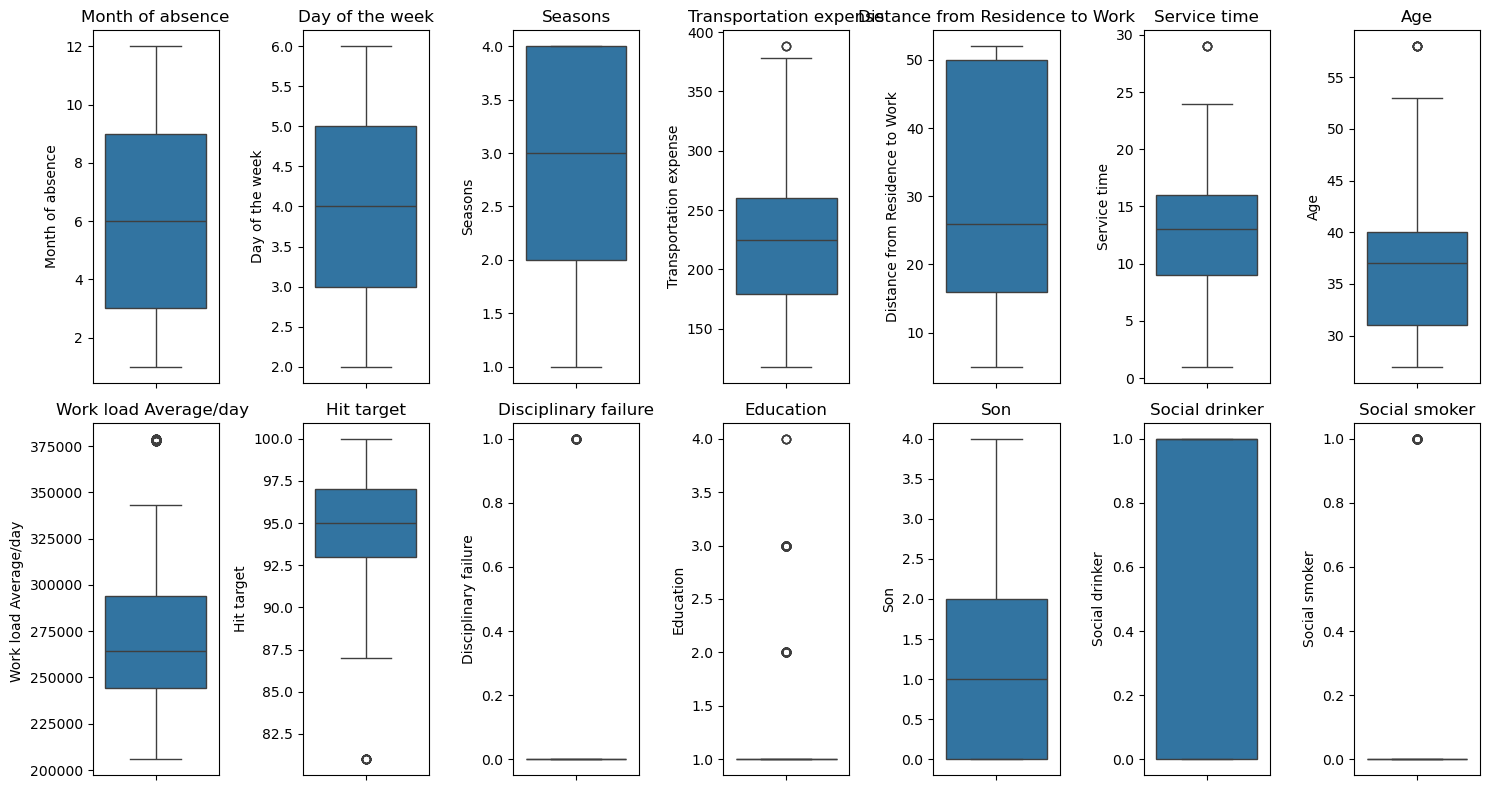

In [435]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tworzenie wykresów pudełkowych dla każdej kolumny
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(15, 8))  # Dopasowanie rozmiaru
axs = axs.flatten()

# Tworzymy boxploty tylko dla zmiennych numerycznych
for index, column in enumerate(df_cleaned.columns):
    if index < len(axs):
        sns.boxplot(y=df_cleaned[column], ax=axs[index])
        axs[index].set_title(column)

# Poprawienie rozmieszczenia wykresów
plt.tight_layout()
plt.show()


### **d) Dyskretyzacja danych**
Zmiana Absenteeism time in hours na '1' jeśli większe od 0 i na '0' jeśli 0

Umożliwi to wykrywanie 2 stanów: obecny / nieobecny

In [436]:
df_cleaned['Absenteeism time in hours'] = df_cleaned['Absenteeism time in hours'].apply(lambda x: 1 if x > 0  else 0) 

## **4. Tworzenie modelu drzew losowych, oraz naiwnego Bayes'a i ich ocena**

### **a) Podział zbioru danych na treningowy i testowy**
Dane zostały podzielone na dane treningowe i testowe w proporcji 80:20. Ze względu na mały rozmiar zbioru, co może być korzystne dla treningu.

Dane są podzielone tak, by porównywalna część stanów 0 i 1 była w obu zbiorach

W całym kodzie random_state=0, aby można było porównywać algotytmy bez wpływu czynników losowych.

In [437]:
X = df_cleaned.drop(columns=['Absenteeism time in hours'])
y = df_cleaned['Absenteeism time in hours']

# Podział danych na zbiór treningowy (80%) i testowy (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Weryfikacja rozmiarów zbiorów
rozmiary = pd.DataFrame({
    "Zbiór": ["Treningowy", "Testowy"],
    "Rozmiar": [X_train.shape[0], X_test.shape[0]]
})

# Proporcje w całym zbiorze
proporcje_caly = y.value_counts(normalize=True).reset_index()
proporcje_caly.columns = ["Wartość", "Proporcja"]

# Proporcje w zbiorze treningowym
proporcje_trening = y_train.value_counts(normalize=True).reset_index()
proporcje_trening.columns = ["Wartość", "Proporcja"]

# Proporcje w zbiorze testowym
proporcje_test = y_test.value_counts(normalize=True).reset_index()
proporcje_test.columns = ["Wartość", "Proporcja"]

# Wyświetlanie tabel z tytułami
display(Markdown("### Rozmiary zbiorów"))
display(Markdown(rozmiary.to_html(index=False, escape=False)))

display(Markdown("### Proporcje w całym zbiorze danych"))
display(Markdown(round(proporcje_caly,2).to_html(index=False, escape=False)))

display(Markdown("### Proporcje w zbiorze treningowym"))
display(Markdown(round(proporcje_trening,2).to_html(index=False, escape=False)))

display(Markdown("### Proporcje w zbiorze testowym"))
display(Markdown(round(proporcje_test,2).to_html(index=False, escape=False)))


### Rozmiary zbiorów

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Zbiór</th>
      <th>Rozmiar</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Treningowy</td>
      <td>592</td>
    </tr>
    <tr>
      <td>Testowy</td>
      <td>148</td>
    </tr>
  </tbody>
</table>

### Proporcje w całym zbiorze danych

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Wartość</th>
      <th>Proporcja</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>0.94</td>
    </tr>
    <tr>
      <td>0</td>
      <td>0.06</td>
    </tr>
  </tbody>
</table>

### Proporcje w zbiorze treningowym

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Wartość</th>
      <th>Proporcja</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>0.94</td>
    </tr>
    <tr>
      <td>0</td>
      <td>0.06</td>
    </tr>
  </tbody>
</table>

### Proporcje w zbiorze testowym

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Wartość</th>
      <th>Proporcja</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>0.93</td>
    </tr>
    <tr>
      <td>0</td>
      <td>0.07</td>
    </tr>
  </tbody>
</table>

### **b) Tworzenie i trenowanie modeli**
- RandomForestClassifier(random_state=0, n_estimators=100)

  *od 3 drzew nie widać różnicy w skuteczności ale ze względu na mały zbiór testowy i nie wielką ilość danych wartość została ustawiona na 100, nie wydłuża to odczuwalnie czasu treningu a może poprawić*
- GaussianNB()

In [438]:
# Tworzenie modeli
rf_model = RandomForestClassifier(random_state=0, n_estimators=100)  # Zmieniono na RandomForestClassifier
nb_model = GaussianNB()  # Tworzenie modelu Naive Bayes

# Trenowanie modelu Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
# Trenowanie modelu Naive Bayes
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

### **c) Przedstawienie wyników oraz porównanie algorytmów**
Do porównania algorytmów wykorzystałem: ```Dokładność, Precyzję, Czułość, Wynik F1```

Do wizualizacji skuteczności wykorzystana została macierz z wartościami: TP, TN, FP, FN

### Tabela wyników dla modeli Random Forest i Naive Bayes

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Metryka</th>
      <th>Random Forest</th>
      <th>Naive Bayes</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Dokładność</td>
      <td>0.993</td>
      <td>0.905</td>
    </tr>
    <tr>
      <td>Precyzja</td>
      <td>0.996</td>
      <td>0.462</td>
    </tr>
    <tr>
      <td>Czułość</td>
      <td>0.955</td>
      <td>0.489</td>
    </tr>
    <tr>
      <td>Wynik F1</td>
      <td>0.974</td>
      <td>0.475</td>
    </tr>
  </tbody>
</table>

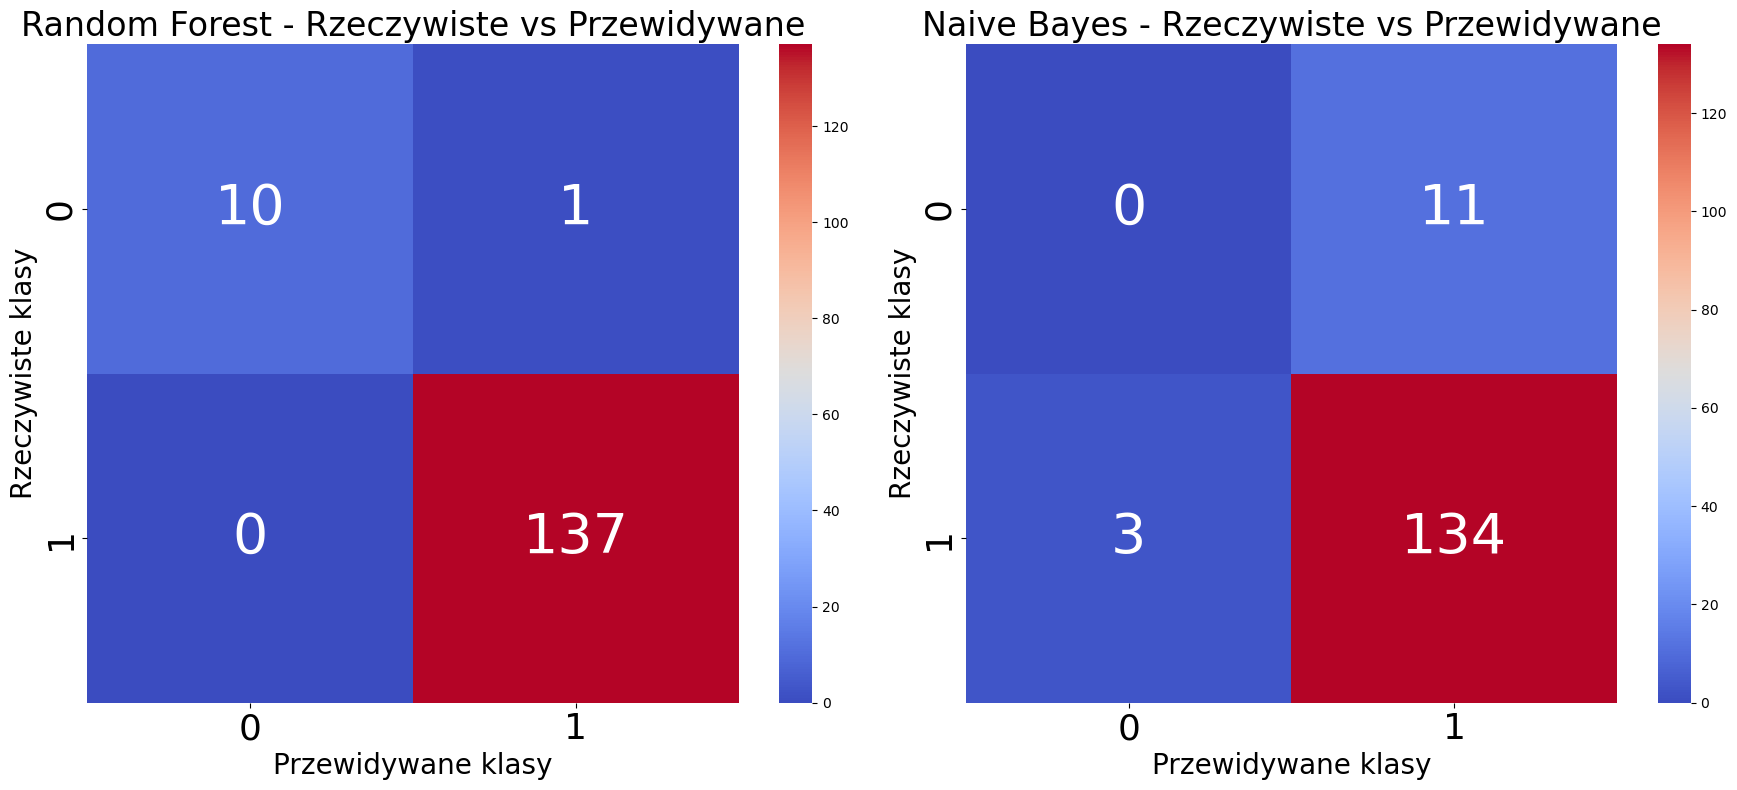

In [439]:
# Ocena modelu Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Ocena modelu Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)

# Tworzenie tabeli wyników
results = pd.DataFrame({
    'Metryka': ['Dokładność', 'Precyzja', 'Czułość', 'Wynik F1'],
    'Random Forest': [
        accuracy_rf,
        report_rf['macro avg']['precision'],
        report_rf['macro avg']['recall'],
        report_rf['macro avg']['f1-score']
    ],
    'Naive Bayes': [
        accuracy_nb,
        report_nb['macro avg']['precision'],
        report_nb['macro avg']['recall'],
        report_nb['macro avg']['f1-score']
    ]
})

# Wyświetlenie tabeli wyników w formacie HTML
display(Markdown("### Tabela wyników dla modeli Random Forest i Naive Bayes"))
display(Markdown(round(results,3).to_html(index=False, escape=False)))

# Przygotowanie danych dla Random Forest
rf_comparison = pd.DataFrame({
    "Rzeczywiste": y_test,
    "Przewidywane": y_pred_rf
})

# Przygotowanie danych dla Naive Bayes
nb_comparison = pd.DataFrame({
    "Rzeczywiste": y_test,
    "Przewidywane": y_pred_nb
})

# Tworzenie tabel krzyżowych
rf_heatmap = pd.crosstab(rf_comparison["Rzeczywiste"], rf_comparison["Przewidywane"])
nb_heatmap = pd.crosstab(nb_comparison["Rzeczywiste"], nb_comparison["Przewidywane"])

# Ustawienie wykresów obok siebie
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Heatmap dla Random Forest
sns.heatmap(rf_heatmap, annot=True, cmap="coolwarm", fmt="d", cbar=True, ax=axes[0], annot_kws={"size": 40})
axes[0].set_title("Random Forest - Rzeczywiste vs Przewidywane", fontsize=24)
axes[0].set_xlabel("Przewidywane klasy", fontsize=20)
axes[0].set_ylabel("Rzeczywiste klasy", fontsize=20)
axes[0].tick_params(axis='y', labelsize=26)
axes[0].tick_params(axis='x', labelsize=26)
# Heatmap dla Naive Bayes
sns.heatmap(nb_heatmap, annot=True, cmap="coolwarm", fmt="d", cbar=True, ax=axes[1], annot_kws={"size": 40})
axes[1].set_title("Naive Bayes - Rzeczywiste vs Przewidywane", fontsize=24)
axes[1].set_xlabel("Przewidywane klasy", fontsize=20)
axes[1].set_ylabel("Rzeczywiste klasy", fontsize=20)
axes[1].tick_params(axis='y', labelsize=26)
axes[1].tick_params(axis='x', labelsize=26)
# Dostosowanie układu
plt.tight_layout()
plt.show()


###  **d) Przykładowe użycie klasyfikacji**
W tym celu losowane jest 5 wierszy danych zgodnie z opisem specyfikacji zbioru. (są wyświetlane pod wynikiem klasyfikacji)

In [440]:
# Generowanie losowych danych (przykład dla 5 wierszy)
random_data = {
    'Month of absence': np.random.randint(1, 13, 5),
    'Day of the week': np.random.randint(2, 6, 5),
    'Seasons': [], 
    'Transportation expense': np.random.randint(0, 1000, 5),
    'Distance from Residence to Work': np.random.randint(1, 150, 5),
    'Service time': np.random.randint(1, 50, 5),
    'Age': np.random.randint(18, 80, 5),
    'Work load Average/day ': np.random.randint(200, 400, 5),  # Spacja na końcu >.<
    'Hit target': np.random.randint(80, 100, 5),
    'Disciplinary failure': np.random.choice([0,1],5),
    'Education': np.random.randint(1, 4, 5),
    'Son': np.random.randint(0, 4, 5),
    'Social drinker': np.random.choice([0,1],5),
    'Social smoker': np.random.choice([0,1],5),
    'Pet': np.random.randint(0, 3, 5),
}

# Uzupełnianie kolumny 'Seasons' na podstawie 'Month of absence'
for month in random_data['Month of absence']:
    if 10 <= month <= 12:
        random_data['Seasons'].append(4)  # Zima
    elif 7 <= month <= 9:
        random_data['Seasons'].append(1)  # Lato
    elif 4 <= month <= 6:
        random_data['Seasons'].append(3)  # Wiosna
    elif 1 <= month <= 3:
        random_data['Seasons'].append(2)  # Jesień
# Konwersja słownika do DataFrame
random_row = pd.DataFrame(random_data)
# Przewidywanie wyników za pomocą modeli
y_pred_rf = rf_model.predict(random_row)
y_pred_nb = nb_model.predict(random_row)

# Funkcja do zamiany '1' na '1 - absent'
def modify_predictions(predictions):
    return ['1 - absent' if pred == 1 else pred for pred in predictions]

# Zastosowanie funkcji do predykcji
y_pred_rf_modified = modify_predictions(y_pred_rf)
y_pred_nb_modified = modify_predictions(y_pred_nb)

# Tworzenie tabeli wyników
predictions = pd.DataFrame({
    'Index': [0, 1, 2, 3, 4],
    'Random Forest Predictions': y_pred_rf_modified,
    'Naive Bayes Predictions': y_pred_nb_modified
})

# Wyświetlenie tabeli wyników w formacie HTML
display(Markdown("### Tabela predykcji dla modeli Random Forest i Naive Bayes"))
display(Markdown(predictions.to_html(index=False, escape=False)))
random_row

### Tabela predykcji dla modeli Random Forest i Naive Bayes

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Index</th>
      <th>Random Forest Predictions</th>
      <th>Naive Bayes Predictions</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>1 - absent</td>
      <td>1 - absent</td>
    </tr>
    <tr>
      <td>1</td>
      <td>1 - absent</td>
      <td>1 - absent</td>
    </tr>
    <tr>
      <td>2</td>
      <td>1 - absent</td>
      <td>1 - absent</td>
    </tr>
    <tr>
      <td>3</td>
      <td>1 - absent</td>
      <td>1 - absent</td>
    </tr>
    <tr>
      <td>4</td>
      <td>0</td>
      <td>1 - absent</td>
    </tr>
  </tbody>
</table>

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet
0,7,2,1,147,68,34,62,340,94,0,1,3,0,0,2
1,4,4,3,665,128,35,18,346,86,0,2,3,0,0,1
2,7,5,1,492,62,1,48,201,91,0,2,0,0,0,2
3,12,5,4,247,56,44,21,247,87,0,1,0,0,0,1
4,2,4,2,977,33,33,38,245,81,1,2,1,0,1,1


###  **e) Poprawa wyniku**

Ciężko poprawić algorytm drzew losowych, który nie wykrywa zaledwie 1 przypadku już przy 3 drzewach. (zwiększenie ilości drzew nawet do 100000 nie zwiększa skuteczności)

Można natomiast poprawić wyniki dla Naive Bayes po przez pozbycie się mało znaczących cech, by zwiększyć oddziaływanie tych bardziej znaczących.

- #### Sprawdzenie korelacji targetu z cechami

<AxesSubplot:>

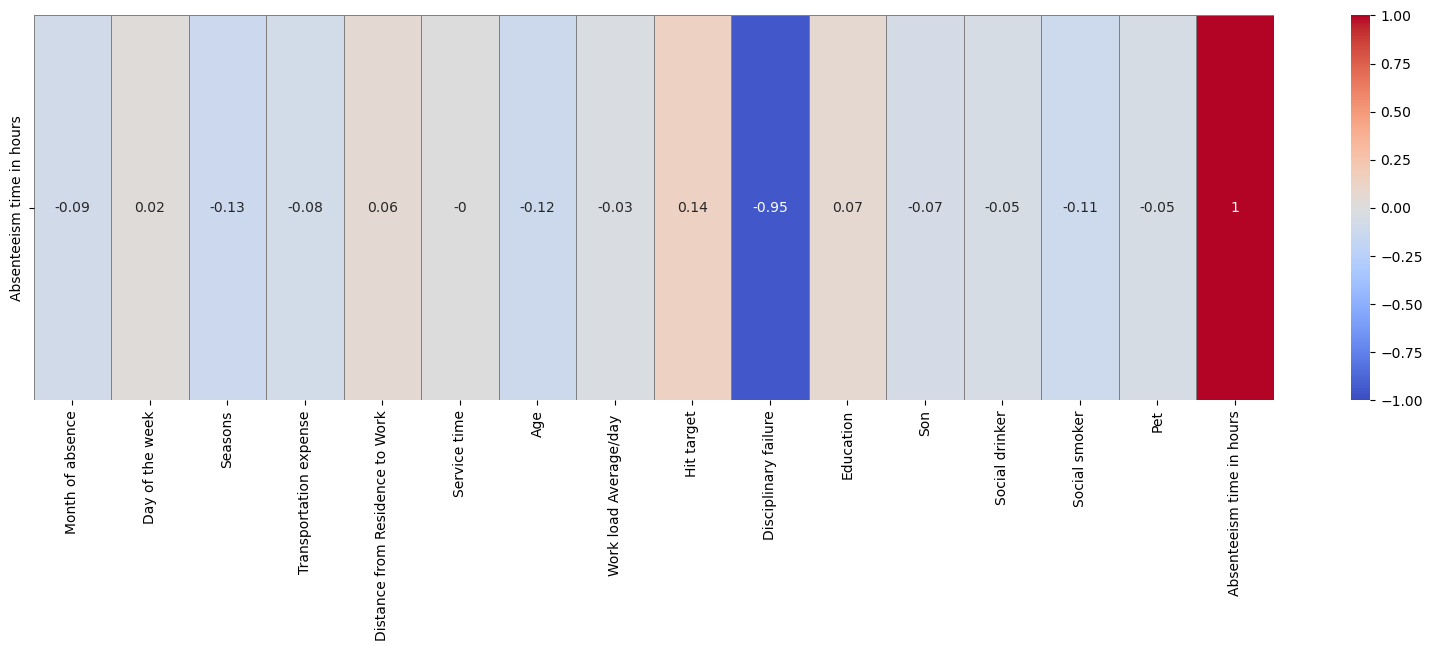

In [441]:
# Korelacja z 'Absenteeism time in hours'
correlation_with_target = df_cleaned.corr()['Absenteeism time in hours']

# Tworzenie DataFrame z korelacjami dla lepszej wizualizacji
correlation_df = correlation_with_target.to_frame().transpose()

# Wykres
f, ax = plt.subplots(figsize=(20, 5))  # Rozmiar dopasowany do jednego wiersza
sns.heatmap(correlation_df.round(2), 
            annot=True, 
            cmap="coolwarm", 
            vmin=-1, 
            vmax=1, 
            cbar=True, 
            linewidths=0.5,
            linecolor='gray')

- #### usunięcie cech, których modół korelacji z targetem jest mniejszy niż 0.1

In [442]:
# Korelacja wszystkich cech
correlations = df_cleaned.corr()

# Korelacja z 'Absenteeism time in hours'
target_correlation = correlations['Absenteeism time in hours']

# Wybierz kolumny, których korelacja jest większa niż 0.1 lub mniejsza niż -0.1
selected_columns = target_correlation[target_correlation.abs() >= 0.1].index.tolist()

# Utwórz nowy dataframe z wybranymi kolumnami
df_selected = df_cleaned[selected_columns]

# Wyświetlenie nowego dataframe
df_selected.head()


,Seasons,Age,Hit target,Disciplinary failure,Social smoker,Absenteeism time in hours
0,1,33,97,0,0,1
1,1,50,97,1,0,0
2,1,38,97,0,0,1
3,1,39,97,0,1,1
4,1,33,97,0,0,1


- #### podział danych na zbiory treningowe i testowe

In [443]:
X = df_selected.drop(columns=['Absenteeism time in hours'])
y = df_selected['Absenteeism time in hours']

# Podział danych na zbiór treningowy (80%) i testowy (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Weryfikacja rozmiarów zbiorów
rozmiary = pd.DataFrame({
    "Zbiór": ["Treningowy", "Testowy"],
    "Rozmiar": [X_train.shape[0], X_test.shape[0]]
})

# Proporcje w całym zbiorze
proporcje_caly = y.value_counts(normalize=True).reset_index()
proporcje_caly.columns = ["Wartość", "Proporcja"]

# Proporcje w zbiorze treningowym
proporcje_trening = y_train.value_counts(normalize=True).reset_index()
proporcje_trening.columns = ["Wartość", "Proporcja"]

# Proporcje w zbiorze testowym
proporcje_test = y_test.value_counts(normalize=True).reset_index()
proporcje_test.columns = ["Wartość", "Proporcja"]

# Wyświetlanie tabel z tytułami
display(Markdown("### Rozmiary zbiorów"))
display(Markdown(rozmiary.to_html(index=False, escape=False)))

display(Markdown("### Proporcje w całym zbiorze danych"))
display(Markdown(round(proporcje_caly,2).to_html(index=False, escape=False)))

display(Markdown("### Proporcje w zbiorze treningowym"))
display(Markdown(round(proporcje_trening,2).to_html(index=False, escape=False)))

display(Markdown("### Proporcje w zbiorze testowym"))
display(Markdown(round(proporcje_test,2).to_html(index=False, escape=False)))


### Rozmiary zbiorów

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Zbiór</th>
      <th>Rozmiar</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Treningowy</td>
      <td>592</td>
    </tr>
    <tr>
      <td>Testowy</td>
      <td>148</td>
    </tr>
  </tbody>
</table>

### Proporcje w całym zbiorze danych

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Wartość</th>
      <th>Proporcja</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>0.94</td>
    </tr>
    <tr>
      <td>0</td>
      <td>0.06</td>
    </tr>
  </tbody>
</table>

### Proporcje w zbiorze treningowym

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Wartość</th>
      <th>Proporcja</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>0.94</td>
    </tr>
    <tr>
      <td>0</td>
      <td>0.06</td>
    </tr>
  </tbody>
</table>

### Proporcje w zbiorze testowym

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Wartość</th>
      <th>Proporcja</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>0.93</td>
    </tr>
    <tr>
      <td>0</td>
      <td>0.07</td>
    </tr>
  </tbody>
</table>

- #### tworzenie modelu

In [444]:
# Tworzenie modeli
rf_model = RandomForestClassifier(random_state=0, n_estimators=100)  # Zmieniono na RandomForestClassifier
nb_model = GaussianNB()  # Tworzenie modelu Naive Bayes

# Trenowanie modelu Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Trenowanie modelu Naive Bayes
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

- #### ocena modeli po modyfikacji

### Tabela wyników dla modeli Random Forest i Naive Bayes

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Metryka</th>
      <th>Random Forest</th>
      <th>Naive Bayes</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Dokładność</td>
      <td>0.993</td>
      <td>0.993</td>
    </tr>
    <tr>
      <td>Precyzja</td>
      <td>0.996</td>
      <td>0.996</td>
    </tr>
    <tr>
      <td>Czułość</td>
      <td>0.955</td>
      <td>0.955</td>
    </tr>
    <tr>
      <td>Wynik F1</td>
      <td>0.974</td>
      <td>0.974</td>
    </tr>
  </tbody>
</table>

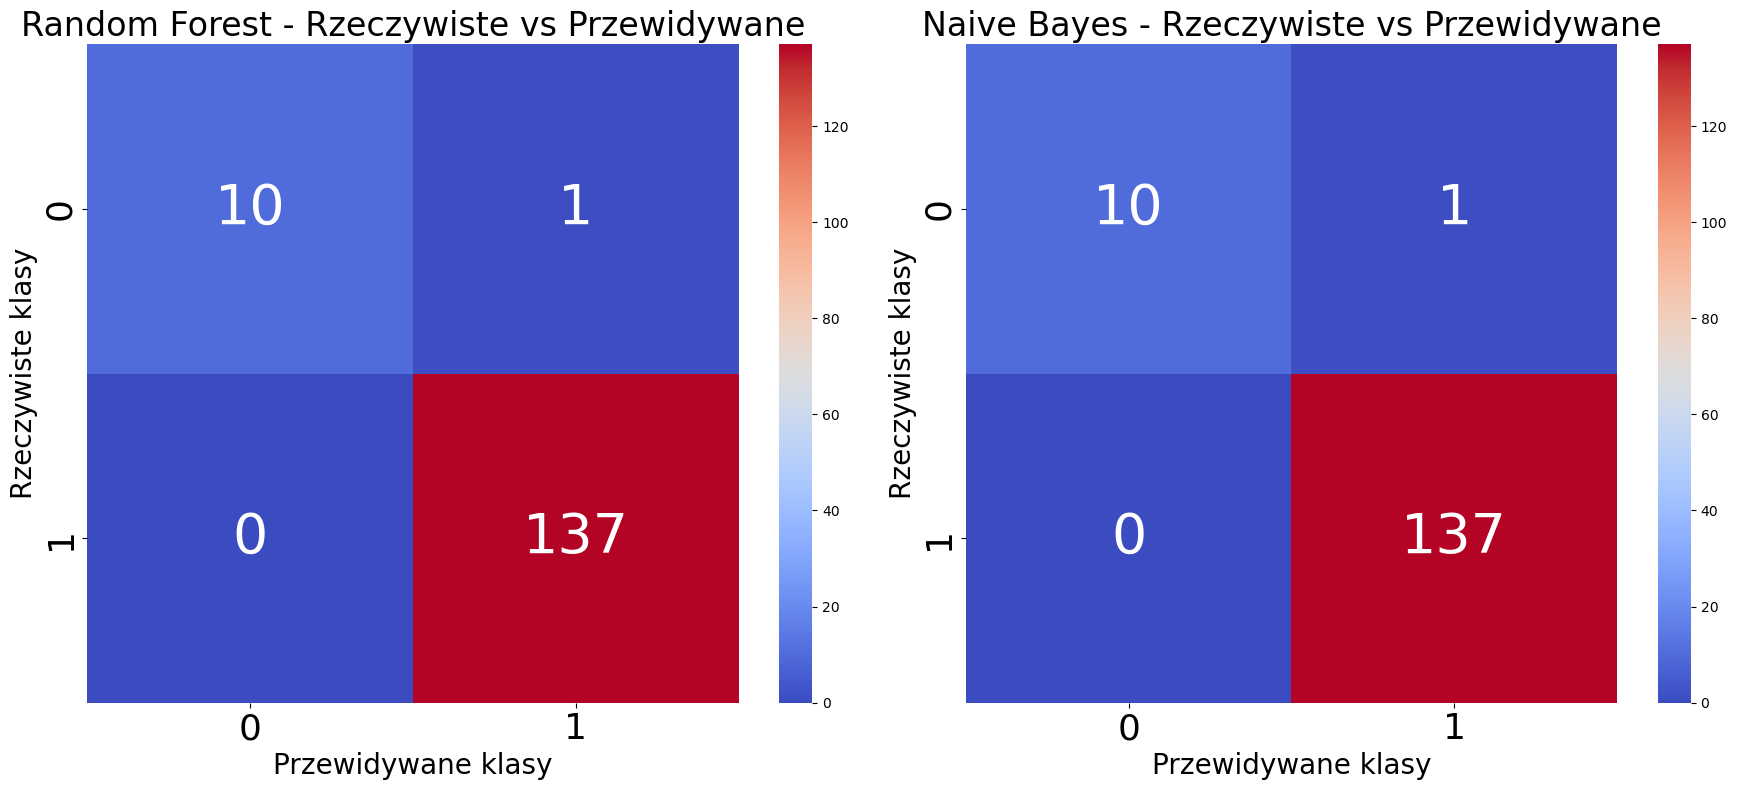

In [445]:
# Ocena modelu Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Ocena modelu Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)

# Tworzenie tabeli wyników
results = pd.DataFrame({
    'Metryka': ['Dokładność', 'Precyzja', 'Czułość', 'Wynik F1'],
    'Random Forest': [
        accuracy_rf,
        report_rf['macro avg']['precision'],
        report_rf['macro avg']['recall'],
        report_rf['macro avg']['f1-score']
    ],
    'Naive Bayes': [
        accuracy_nb,
        report_nb['macro avg']['precision'],
        report_nb['macro avg']['recall'],
        report_nb['macro avg']['f1-score']
    ]
})

# Wyświetlenie tabeli wyników w formacie HTML
display(Markdown("### Tabela wyników dla modeli Random Forest i Naive Bayes"))
display(Markdown(round(results,3).to_html(index=False, escape=False)))

# Przygotowanie danych dla Random Forest
rf_comparison = pd.DataFrame({
    "Rzeczywiste": y_test,
    "Przewidywane": y_pred_rf
})

# Przygotowanie danych dla Naive Bayes
nb_comparison = pd.DataFrame({
    "Rzeczywiste": y_test,
    "Przewidywane": y_pred_nb
})

# Tworzenie tabel krzyżowych
rf_heatmap = pd.crosstab(rf_comparison["Rzeczywiste"], rf_comparison["Przewidywane"])
nb_heatmap = pd.crosstab(nb_comparison["Rzeczywiste"], nb_comparison["Przewidywane"])

# Ustawienie wykresów obok siebie
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Heatmap dla Random Forest
sns.heatmap(rf_heatmap, annot=True, cmap="coolwarm", fmt="d", cbar=True, ax=axes[0], annot_kws={"size": 40})
axes[0].set_title("Random Forest - Rzeczywiste vs Przewidywane", fontsize=24)
axes[0].set_xlabel("Przewidywane klasy", fontsize=20)
axes[0].set_ylabel("Rzeczywiste klasy", fontsize=20)
axes[0].tick_params(axis='y', labelsize=26)
axes[0].tick_params(axis='x', labelsize=26)
# Heatmap dla Naive Bayes
sns.heatmap(nb_heatmap, annot=True, cmap="coolwarm", fmt="d", cbar=True, ax=axes[1], annot_kws={"size": 40})
axes[1].set_title("Naive Bayes - Rzeczywiste vs Przewidywane", fontsize=24)
axes[1].set_xlabel("Przewidywane klasy", fontsize=20)
axes[1].set_ylabel("Rzeczywiste klasy", fontsize=20)
axes[1].tick_params(axis='y', labelsize=26)
axes[1].tick_params(axis='x', labelsize=26)
# Dostosowanie układu
plt.tight_layout()
plt.show()


- #### wywołanie dla poprawionej wersji

In [446]:
# Generowanie losowych danych (przykład dla 5 wierszy)
random_data = {
    'Seasons': np.random.randint(1, 4, 5), 
    'Age': np.random.randint(18, 80, 5),
    'Hit target': np.random.randint(80, 100, 5),
    'Disciplinary failure': np.random.choice([0,1],5),
    'Social smoker': np.random.choice([0,1],5)
}

# Konwersja słownika do DataFrame
random_row = pd.DataFrame(random_data)
# Przewidywanie wyników za pomocą modeli
y_pred_rf = rf_model.predict(random_row)
y_pred_nb = nb_model.predict(random_row)

# Funkcja do zamiany '1' na '1 - absent'
def modify_predictions(predictions):
    return ['1 - absent' if pred == 1 else pred for pred in predictions]

# Zastosowanie funkcji do predykcji
y_pred_rf_modified = modify_predictions(y_pred_rf)
y_pred_nb_modified = modify_predictions(y_pred_nb)

# Tworzenie tabeli wyników
predictions = pd.DataFrame({
    'Index': [0, 1, 2, 3, 4],
    'Random Forest Predictions': y_pred_rf_modified,
    'Naive Bayes Predictions': y_pred_nb_modified
})

# Wyświetlenie tabeli wyników w formacie HTML
display(Markdown("### Tabela predykcji dla modeli Random Forest i Naive Bayes"))
display(Markdown(predictions.to_html(index=False, escape=False)))
random_row

### Tabela predykcji dla modeli Random Forest i Naive Bayes

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Index</th>
      <th>Random Forest Predictions</th>
      <th>Naive Bayes Predictions</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>1 - absent</td>
      <td>1 - absent</td>
    </tr>
    <tr>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <td>2</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <td>3</td>
      <td>1 - absent</td>
      <td>1 - absent</td>
    </tr>
    <tr>
      <td>4</td>
      <td>1 - absent</td>
      <td>1 - absent</td>
    </tr>
  </tbody>
</table>

,Seasons,Age,Hit target,Disciplinary failure,Social smoker
0,2,39,83,0,0
1,3,57,97,1,1
2,1,78,84,1,0
3,1,50,84,0,1
4,1,48,97,0,0


## 5. Podsumuj projekt

### **a) Wnioski**
#### 1. Na podstawie 5 cech: Seasons, Age, Hit target, Disciplinary failure, Social smoker można z precyzją i dokładnością na poziomie 99% określić nieobecność pracownika.

#### 2. W celu stworzenia lepszego modelu przydałoby się więcej danych - zwłaszcza dla osób, które nie są nieobecne ( w całym zbiorze jest zaledwie 6% takich przypadków na 740 wierszy)

#### 3. Dla większej ilości cech lepszy wynik można otrzymać z algorytmu drzew losowych ale po wybraniu 5 cech najbardziej korelujących z targetem alogrytm Naive Bayes radzi sobie równie dobrze jak algorytm drzew losowych

#### 4. Najczęściej nieobecności są w zimę (może to wynikać ze świąt i nowego roku, oraz większego ryzyka zachorowania), a najrzadziej w lato (może to wynikać z brania urlopów, oraz mniejszego ryzyka zachorowania).

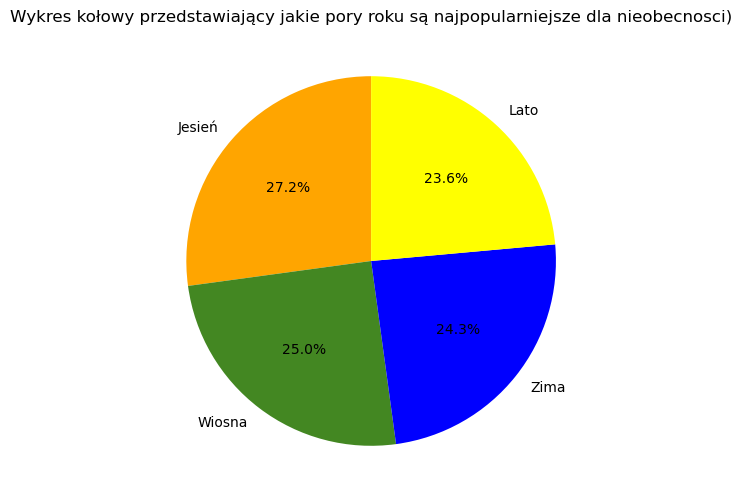

In [447]:
# Przypisanie nazw pór roku i kolorów (zmieniono zieleń na ciemniejszy odcień)
season_names = {1: 'Lato', 2: 'Jesień', 3: 'Zima', 4: 'Wiosna'}
season_colors = {'Lato': 'yellow', 'Jesień': 'orange', 'Zima': 'blue', 'Wiosna': '#438722'}

# Filtracja danych na podstawie warunku Absenteeism time in hours == 1
filtered_data = df_selected[df_selected['Absenteeism time in hours'] == 1].copy()

# Zastąpienie cyfr nazwami pór roku (using .copy() to avoid potential CoW issues)
filtered_data['Seasons'] = filtered_data['Seasons'].map(season_names)

# Wykres kołowy dla Seasons (gdzie Absenteeism time in hours == 1)
plt.figure(figsize=(6, 6))

# Liczba wystąpień dla każdej pory roku
seasons_count = filtered_data['Seasons'].value_counts()

# Dopasowanie kolorów do pór roku (upewniamy się, że dla każdej pory roku przypisany jest odpowiedni kolor)
colors = [season_colors.get(season, 'gray') for season in seasons_count.index]

# Tworzymy wykres kołowy
plt.pie(seasons_count, labels=seasons_count.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Wykres kołowy przedstawiający jakie pory roku są najpopularniejsze dla nieobecnosci)")
plt.show()

#### 5. Najbardziej nieobecne są osoby z przedziału 55-60 lat (prawdopodobnie przez większe ryzyko chorób), a następne w kolejności sa osoby z przedziału 25 - 35 (może to wynikać z zakładania rodziny i młodych dzieci).

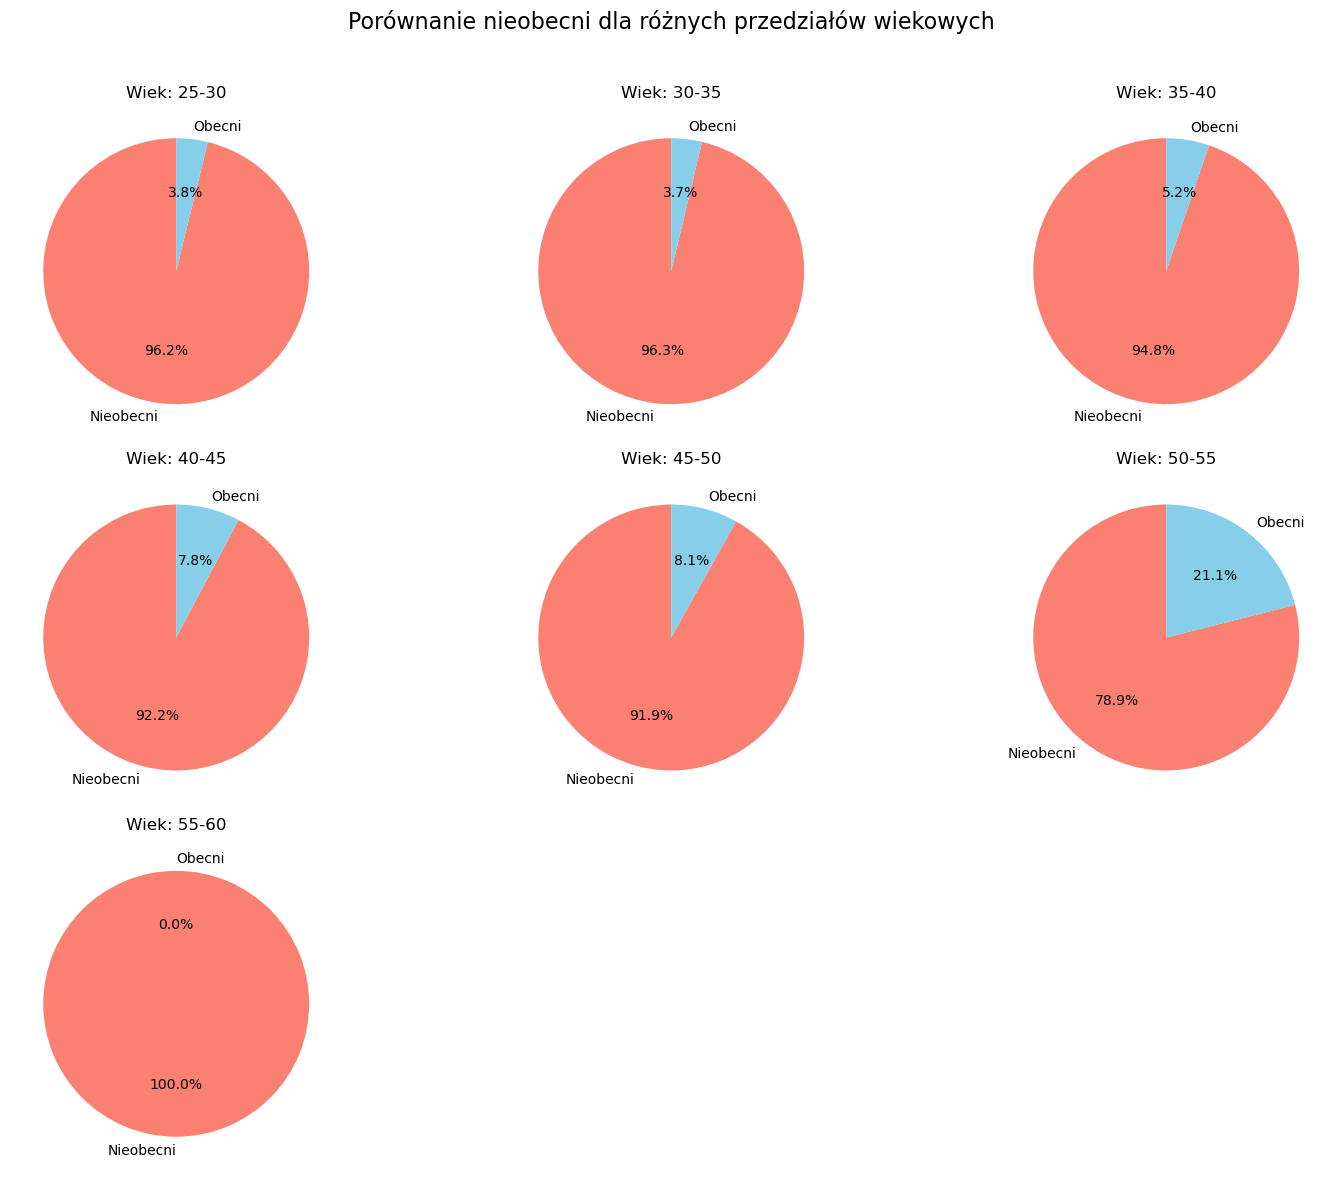

In [448]:
# Usuwanie wybranych kolumn
filtered_data = df_selected.copy()
columns_to_drop = ['Seasons', 'Hit target', 'Disciplinary failure', 'Social smoker']
filtered_data = filtered_data.drop(columns=columns_to_drop)

# Filtracja danych na podstawie warunku Absenteeism time in hours == 1 oraz == 0
filtered_data_1 = filtered_data[filtered_data['Absenteeism time in hours'] == 1]
filtered_data_0 = filtered_data[filtered_data['Absenteeism time in hours'] == 0]

# Zdefiniowanie niestandardowych przedziałów wiekowych
age_bins = [25, 30, 35, 40, 45, 50, 55, 60]  # Przedziały <20,25), <25,30), itd.

# Tworzenie wykresów kołowych dla każdego przedziału wiekowego
plt.figure(figsize=(15, 12))

# Pętla po przedziałach wiekowych
for i, (left, right) in enumerate(zip(age_bins[:-1], age_bins[1:])):
    # Filtracja danych w danym przedziale wiekowym
    age_range_1 = filtered_data_1[(filtered_data_1['Age'] >= left) & (filtered_data_1['Age'] < right)]
    age_range_0 = filtered_data_0[(filtered_data_0['Age'] >= left) & (filtered_data_0['Age'] < right)]

    # Liczenie liczby osób w danym przedziale wiekowym
    count_1 = len(age_range_1)
    count_0 = len(age_range_0)

    # Sprawdzanie, czy przedział wiekowy zawiera dane (nie jest pusty)
    if count_1 + count_0 > 0:  # Jeżeli są dane do wyświetlenia
        sizes = [count_1, count_0]
        labels = ['Nieobecni', 'Obecni']
        colors = ['salmon', 'skyblue']

        # Tworzenie wykresu kołowego w siatce
        plt.subplot(3, 3, i + 1)  # Siatka 3x3 dla 9 wykresów
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
        plt.title(f'Wiek: {left}-{right}')
    else:
        # W przypadku braku danych w przedziale wiekowym, dodaj puste wykresy
        plt.subplot(3, 3, i + 1)
        plt.text(0.5, 0.5, "Brak danych", horizontalalignment='center', verticalalignment='center', fontsize=12)

# Tytuł wykresu
plt.suptitle("Porównanie nieobecni dla różnych przedziałów wiekowych", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Dostosowanie marginesu górnego, aby tytuł się nie nakładał
plt.show()

#### 6. Osoby nieobecne często nie są w stanie osiągnąć celu stąd ta cecha jest kluczowa w określeniu, czy ktoś jest nieobecny.

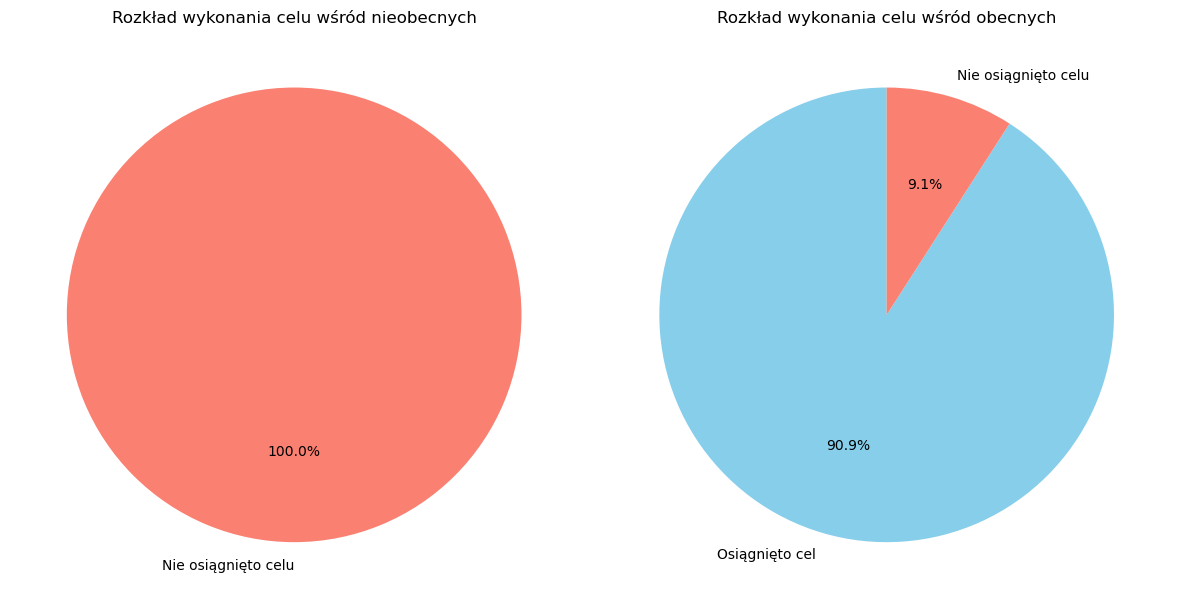

In [449]:
# Filtracja danych dla Absenteeism time in hours == 1
filtered_data_1 = df_selected[df_selected['Absenteeism time in hours'] == 1].copy()

# Filtracja danych dla Absenteeism time in hours == 0
filtered_data_0 = df_selected[df_selected['Absenteeism time in hours'] == 0].copy()

# Usuwanie niepotrzebnych kolumn
columns_to_drop = ['Seasons', 'Age', 'Hit target', 'Social smoker']
filtered_data_1 = filtered_data_1.drop(columns=columns_to_drop)
filtered_data_0 = filtered_data_0.drop(columns=columns_to_drop)

# Wykresy kołowe dla 'Disciplinary failure' w zależności od Absenteeism time in hours

# Tworzenie wykresu kołowego dla Absenteeism time in hours == 1
plt.figure(figsize=(12, 6))

# Liczba wystąpień dla każdej wartości 'Disciplinary failure' w przypadku Absenteeism time in hours == 1
disciplinary_count_1 = filtered_data_1['Disciplinary failure'].value_counts()

# Kolory (ręcznie przypisane)
colors_1 = ['salmon', 'skyblue']

# Wykres kołowy dla Absenteeism time in hours == 1
plt.subplot(1, 2, 1)
plt.pie(disciplinary_count_1, labels=['Nie osiągnięto celu', 'Osiągnięto cel'][:len(disciplinary_count_1)] , autopct='%1.1f%%', startangle=90, colors=colors_1)
plt.title("Rozkład wykonania celu wśród nieobecnych")

# Liczba wystąpień dla każdej wartości 'Disciplinary failure' w przypadku Absenteeism time in hours == 0
disciplinary_count_0 = filtered_data_0['Disciplinary failure'].value_counts()

# Kolory (ręcznie przypisane)
colors_0 = [ 'skyblue', 'salmon']

# Wykres kołowy dla Absenteeism time in hours == 0
plt.subplot(1, 2, 2)
plt.pie(disciplinary_count_0, labels=[ 'Osiągnięto cel','Nie osiągnięto celu'][:len(disciplinary_count_0)], autopct='%1.1f%%', startangle=90, colors=colors_0)
plt.title("Rozkład wykonania celu wśród obecnych")

plt.tight_layout()
plt.show()


#### 7. Osoby palące częściej są nieobecne niż osoby niepalące. Może mieć to związek z bezpośrednim wpływem palenia na zdrowie.

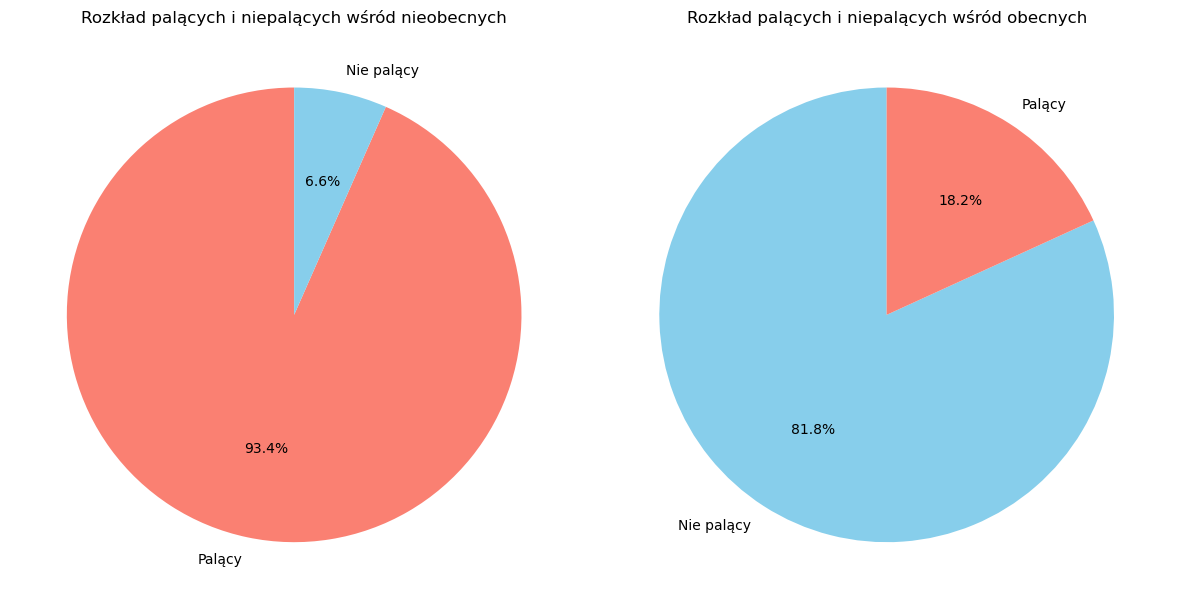

In [450]:
# Filtracja danych dla Absenteeism time in hours == 1
filtered_data_1 = df_selected[df_selected['Absenteeism time in hours'] == 1].copy()

# Filtracja danych dla Absenteeism time in hours == 0
filtered_data_0 = df_selected[df_selected['Absenteeism time in hours'] == 0].copy()

# Usuwanie niepotrzebnych kolumn
columns_to_drop = ['Seasons', 'Age', 'Hit target', 'Disciplinary failure']
filtered_data_1 = filtered_data_1.drop(columns=columns_to_drop)
filtered_data_0 = filtered_data_0.drop(columns=columns_to_drop)

# Tworzenie wykresu kołowego dla Absenteeism time in hours == 1 (nieobecni)
plt.figure(figsize=(12, 6))

# Liczba wystąpień dla 'Social smoker' w przypadku Absenteeism time in hours == 1
smoking_count_1 = filtered_data_1['Social smoker'].value_counts()

# Kolory (ręcznie przypisane)
colors_1 = ['salmon', 'skyblue']

# Wykres kołowy dla Absenteeism time in hours == 1
plt.subplot(1, 2, 1)
plt.pie(smoking_count_1, labels=['Palący', 'Nie palący'][:len(smoking_count_1)], autopct='%1.1f%%', startangle=90, colors=colors_1)
plt.title("Rozkład palących i niepalących wśród nieobecnych")

# Liczba wystąpień dla 'Social smoker' w przypadku Absenteeism time in hours == 0
smoking_count_0 = filtered_data_0['Social smoker'].value_counts()

# Kolory (ręcznie przypisane)
colors_0 = ['skyblue', 'salmon']

# Wykres kołowy dla Absenteeism time in hours == 0
plt.subplot(1, 2, 2)
plt.pie(smoking_count_0, labels=[ 'Nie palący', 'Palący'][:len(smoking_count_0)], autopct='%1.1f%%', startangle=90, colors=colors_0)
plt.title("Rozkład palących i niepalących wśród obecnych")

# Dopasowanie wykresów
plt.tight_layout()
plt.show()
